# Data Exploration on our 37 000 books

## Imports

In [4]:
# imports and setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import csv
import os 
import sys 

# import and instanciate config file to get access to paths
os.chdir(os.path.dirname(os.getcwd()))
from config.config import Config
config = Config()

# import utils functions
from src.utils.enrich_metadata import count_words, count_chars

### Let's open our CSV file containing our list of books and meta data

In [5]:
# read our book metadata csv file and store to dataframe
books_df = pd.read_csv(os.path.join(config.PROJECT_ROOT, config.DATA_PROCESSED_PATH, 'books_metadata.csv'), names=['id', 'title', 'authors', 'subjects', 'languages', 'formats', 'download_count'])
books_df

,id,title,authors,subjects,languages,formats,download_count
0,16389,The Enchanted April,Von Arnim Elizabeth,British -- Italy -- Fiction Domestic fiction F...,en,https://www.gutenberg.org/ebooks/16389.txt.utf-8,118812
1,1513,Romeo and Juliet,Shakespeare William,Conflict of generations -- Drama Juliet (Ficti...,en,https://www.gutenberg.org/ebooks/1513.txt.utf-8,103473
2,37106,Little Women; Or Meg Jo Beth and Amy,Alcott Louisa May,Autobiographical fiction Bildungsromans Domest...,en,https://www.gutenberg.org/ebooks/37106.txt.utf-8,98681
3,145,Middlemarch,Eliot George,Bildungsromans City and town life -- Fiction D...,en,https://www.gutenberg.org/ebooks/145.txt.utf-8,85099
4,2641,A Room with a View,Forster E. M. (Edward Morgan),British -- Italy -- Fiction England -- Fiction...,en,https://www.gutenberg.org/ebooks/2641.txt.utf-8,84883
...,...,...,...,...,...,...,...
37663,6246,The Right of Way — Volume 04,Parker Gilbert,Canadian fiction,en,https://www.gutenberg.org/ebooks/6246.txt.utf-8,0
37664,6262,The Weavers: a tale of England and Egypt of fi...,Parker Gilbert,Society of Friends -- Fiction,en,https://www.gutenberg.org/ebooks/6262.txt.utf-8,0
37665,6297,Carnac's Folly Volume 2.,Parker Gilbert,Fiction,en,https://www.gutenberg.org/ebooks/6297.txt.utf-8,0
37666,8266,The World English Bible (WEB): Malachi,Anonymous,Bible. Malachi,en,https://www.gutenberg.org/ebooks/8266.txt.utf-8,0


### Let's drop the few none english books

In [6]:
books_df['languages'].value_counts()

languages
en     37638
de        23
brx        2
cy         2
ceb        1
el         1
ale        1
Name: count, dtype: int64

In [7]:
books_df[books_df['languages'] == 'en']
books_df

,id,title,authors,subjects,languages,formats,download_count
0,16389,The Enchanted April,Von Arnim Elizabeth,British -- Italy -- Fiction Domestic fiction F...,en,https://www.gutenberg.org/ebooks/16389.txt.utf-8,118812
1,1513,Romeo and Juliet,Shakespeare William,Conflict of generations -- Drama Juliet (Ficti...,en,https://www.gutenberg.org/ebooks/1513.txt.utf-8,103473
2,37106,Little Women; Or Meg Jo Beth and Amy,Alcott Louisa May,Autobiographical fiction Bildungsromans Domest...,en,https://www.gutenberg.org/ebooks/37106.txt.utf-8,98681
3,145,Middlemarch,Eliot George,Bildungsromans City and town life -- Fiction D...,en,https://www.gutenberg.org/ebooks/145.txt.utf-8,85099
4,2641,A Room with a View,Forster E. M. (Edward Morgan),British -- Italy -- Fiction England -- Fiction...,en,https://www.gutenberg.org/ebooks/2641.txt.utf-8,84883
...,...,...,...,...,...,...,...
37663,6246,The Right of Way — Volume 04,Parker Gilbert,Canadian fiction,en,https://www.gutenberg.org/ebooks/6246.txt.utf-8,0
37664,6262,The Weavers: a tale of England and Egypt of fi...,Parker Gilbert,Society of Friends -- Fiction,en,https://www.gutenberg.org/ebooks/6262.txt.utf-8,0
37665,6297,Carnac's Folly Volume 2.,Parker Gilbert,Fiction,en,https://www.gutenberg.org/ebooks/6297.txt.utf-8,0
37666,8266,The World English Bible (WEB): Malachi,Anonymous,Bible. Malachi,en,https://www.gutenberg.org/ebooks/8266.txt.utf-8,0


### Let's add a couple columns on our dataset

In [8]:
books_df['char_count'] = books_df['id'].apply(count_chars)
books_df['word_count'] = books_df['id'].apply(count_words)

In [ ]:
books_df

,id,title,authors,subjects,languages,formats,download_count,char_count,word_count
0,16389,The Enchanted April,Von Arnim Elizabeth,British -- Italy -- Fiction Domestic fiction F...,en,https://www.gutenberg.org/ebooks/16389.txt.utf-8,118812,NaN,NaN
1,1513,Romeo and Juliet,Shakespeare William,Conflict of generations -- Drama Juliet (Ficti...,en,https://www.gutenberg.org/ebooks/1513.txt.utf-8,103473,NaN,NaN
2,37106,Little Women; Or Meg Jo Beth and Amy,Alcott Louisa May,Autobiographical fiction Bildungsromans Domest...,en,https://www.gutenberg.org/ebooks/37106.txt.utf-8,98681,NaN,NaN
3,145,Middlemarch,Eliot George,Bildungsromans City and town life -- Fiction D...,en,https://www.gutenberg.org/ebooks/145.txt.utf-8,85099,NaN,NaN
4,2641,A Room with a View,Forster E. M. (Edward Morgan),British -- Italy -- Fiction England -- Fiction...,en,https://www.gutenberg.org/ebooks/2641.txt.utf-8,84883,NaN,NaN
...,...,...,...,...,...,...,...,...,...
37663,6246,The Right of Way — Volume 04,Parker Gilbert,Canadian fiction,en,https://www.gutenberg.org/ebooks/6246.txt.utf-8,0,141001.0,25013.0
37664,6262,The Weavers: a tale of England and Egypt of fi...,Parker Gilbert,Society of Friends -- Fiction,en,https://www.gutenberg.org/ebooks/6262.txt.utf-8,0,254733.0,45708.0
37665,6297,Carnac's Folly Volume 2.,Parker Gilbert,Fiction,en,https://www.gutenberg.org/ebooks/6297.txt.utf-8,0,61164.0,10794.0
37666,8266,The World English Bible (WEB): Malachi,Anonymous,Bible. Malachi,en,https://www.gutenberg.org/ebooks/8266.txt.utf-8,0,24858.0,4054.0


### Data exploration

In [ ]:
# Check out authors with the most books
books_df['authors'].value_counts().head(20)

authors
Various                              2754
Anonymous                             542
Lytton Edward Bulwer Lytton Baron     203
Shakespeare William                   166
Ebers Georg                           146
Kingston William Henry Giles          133
Fenn George Manville                  127
Twain Mark                            120
Jacobs W. W. (William Wymark)         109
Unknown                               105
Motley John Lothrop                   104
Parker Gilbert                        103
Ballantyne R. M. (Robert Michael)      99
Meredith George                        95
Pepys Samuel                           86
Henty G. A. (George Alfred)            84
Howells William Dean                   73
Hawthorne Nathaniel                    73
Baum L. Frank (Lyman Frank)            72
Stratemeyer Edward                     71
Name: count, dtype: int64

In [ ]:
books_df['authors'].head(20)

0                     Von Arnim Elizabeth
1                     Shakespeare William
2                       Alcott Louisa May
3                            Eliot George
4           Forster E. M. (Edward Morgan)
5            Montgomery L. M. (Lucy Maud)
6                     Shakespeare William
7              Gaskell Elizabeth Cleghorn
8                    Smollett T. (Tobias)
9                         Dumas Alexandre
10                         Wagner Richard
11                            Austen Jane
12            Shelley Mary Wollstonecraft
13                          Carroll Lewis
14    Fitzgerald F. Scott (Francis Scott)
15                            Wilde Oscar
16                            Stoker Bram
17                           Ibsen Henrik
18                 Stevenson Robert Louis
19                       Tolstoy Leo graf
Name: authors, dtype: object

<Axes: xlabel='authors'>

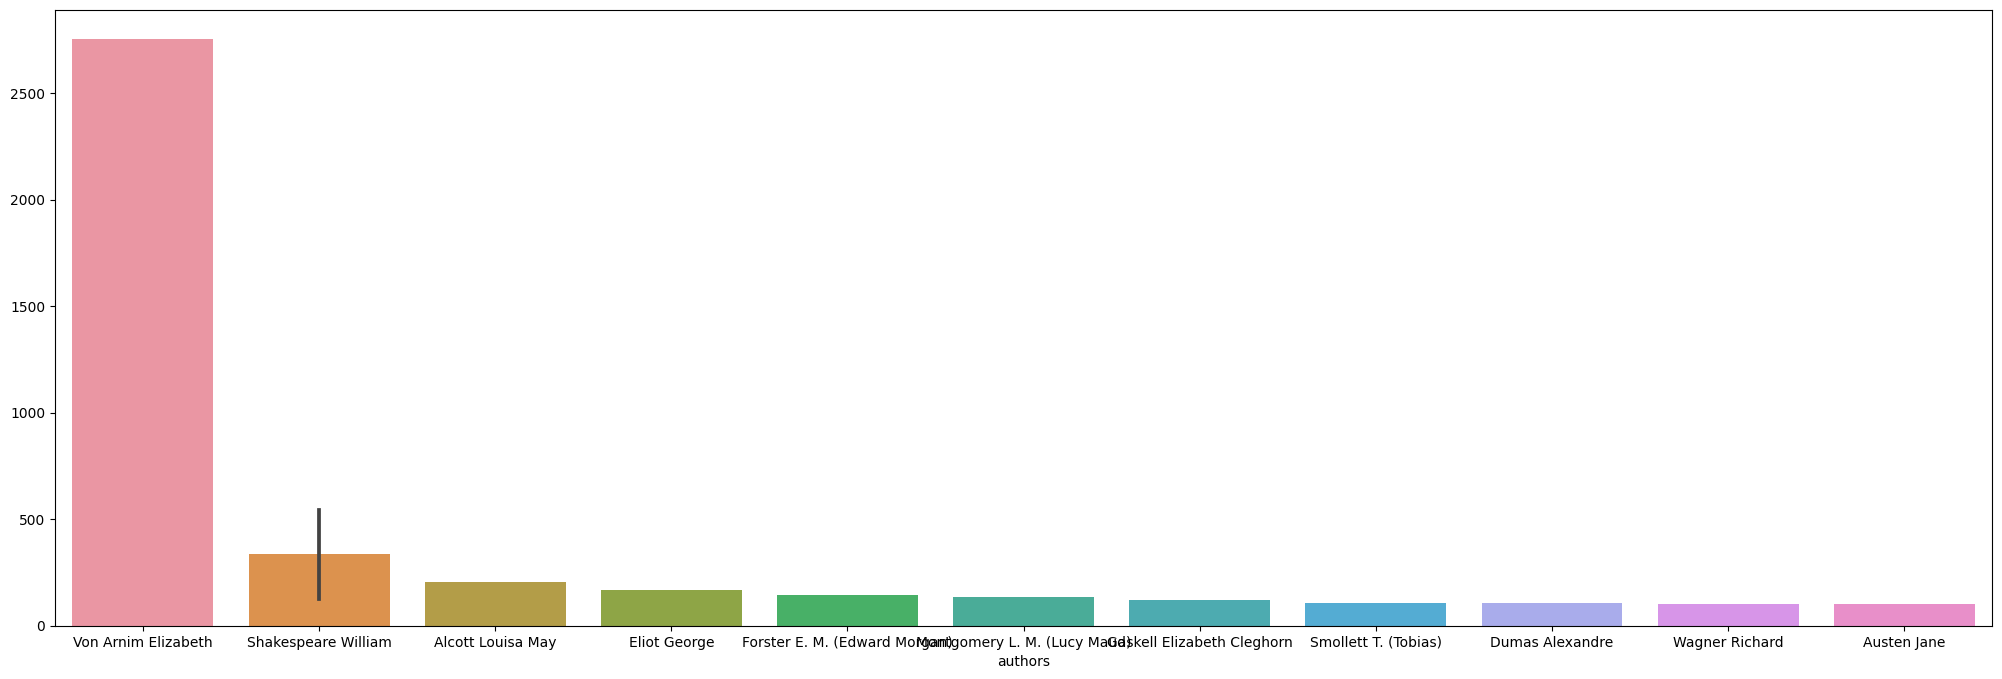

In [ ]:
# let's plot the authors with the most books
plt.figure(figsize=(25,8))
sns.barplot(x=books_df['authors'].head(12), y=books_df['authors'].value_counts().head(12).values)

# 👆 Something is fishy with Elizabeth 🐟

In [ ]:
# WHAT?! 'United States. Central Intelligence Agency'
books_df[books_df['authors'] == 'United States. Central Intelligence Agency']

,id,title,authors,subjects,languages,formats,download_count,char_count,word_count
779,35830,The 2010 CIA World Factbook,United States. Central Intelligence Agency,Geography -- Handbooks manuals etc. Political ...,en,https://www.gutenberg.org/files/35830/35830-re...,607,NaN,NaN
1875,14,The 1990 CIA World Factbook,United States. Central Intelligence Agency,Geography -- Handbooks manuals etc. Political ...,en,https://www.gutenberg.org/ebooks/14.txt.utf-8,243,1916588.0,266133.0
2623,27638,The 2001 CIA World Factbook,United States. Central Intelligence Agency,Geography -- Handbooks manuals etc. Political ...,en,https://www.gutenberg.org/files/27638/27638-RE...,174,NaN,NaN
2645,3672,The 2000 CIA World Factbook,United States. Central Intelligence Agency,Geography -- Handbooks manuals etc. Political ...,en,https://www.gutenberg.org/ebooks/3672.txt.utf-8,172,3397569.0,495815.0
3213,6344,The 2002 CIA World Factbook,United States. Central Intelligence Agency,Geography -- Handbooks manuals etc. Political ...,en,https://www.gutenberg.org/ebooks/6344.txt.utf-8,141,3759698.0,530425.0
3508,27348,The 2007 CIA World Factbook,United States. Central Intelligence Agency,Geography -- Handbooks manuals etc. Political ...,en,https://www.gutenberg.org/files/27348/27348-RE...,130,NaN,NaN
3642,25,The 1991 CIA World Factbook,United States. Central Intelligence Agency,Geography -- Handbooks manuals etc. Political ...,en,https://www.gutenberg.org/ebooks/25.txt.utf-8,125,2160119.0,289088.0
3685,27558,The 2003 CIA World Factbook,United States. Central Intelligence Agency,Geography -- Handbooks manuals etc. Political ...,en,https://www.gutenberg.org/files/27558/27558-RE...,124,NaN,NaN
4203,35829,The 2009 CIA World Factbook,United States. Central Intelligence Agency,Political science -- Handbooks manuals etc. Po...,en,https://www.gutenberg.org/files/35829/35829-re...,109,NaN,NaN
4496,48,The 1992 CIA World Factbook,United States. Central Intelligence Agency,Geography -- Handbooks manuals etc. Political ...,en,https://www.gutenberg.org/ebooks/48.txt.utf-8,102,2416909.0,327638.0


## Replay the next cell to get a new book author every time 👇

In [ ]:
books_df['authors'].sample(1).values[0]

'Kleiser Grenville'

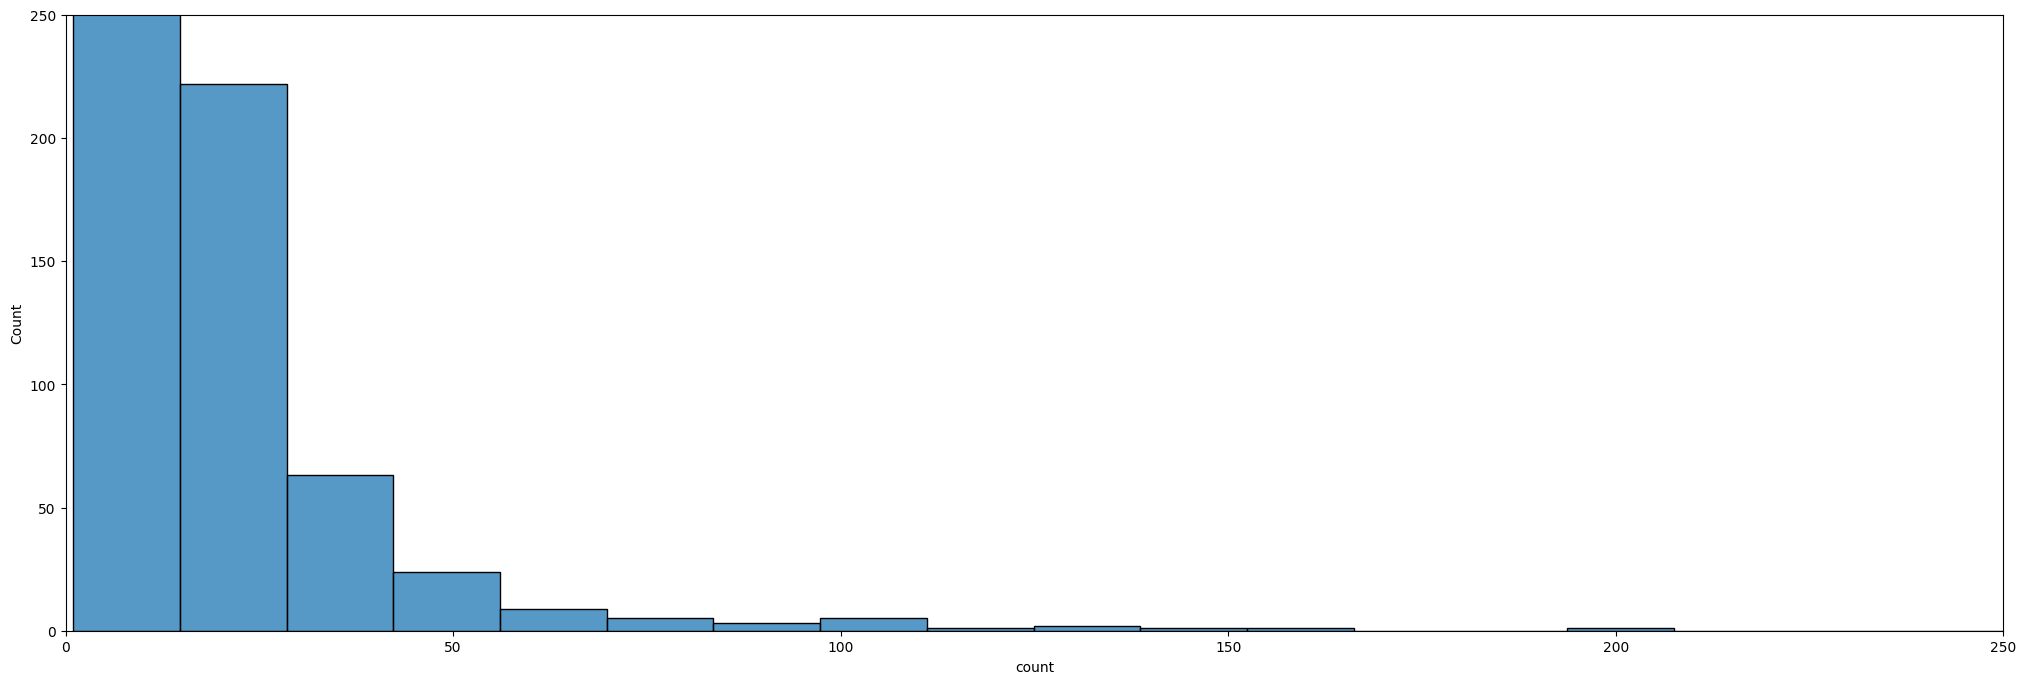

In [ ]:
# let's plot the distribution of the number of books per author
plt.figure(figsize=(25,8))
plt.ylim(0, 250)
plt.xlim(0, 250)
sns.histplot(books_df['authors'].value_counts(), bins=200)
plt.show()

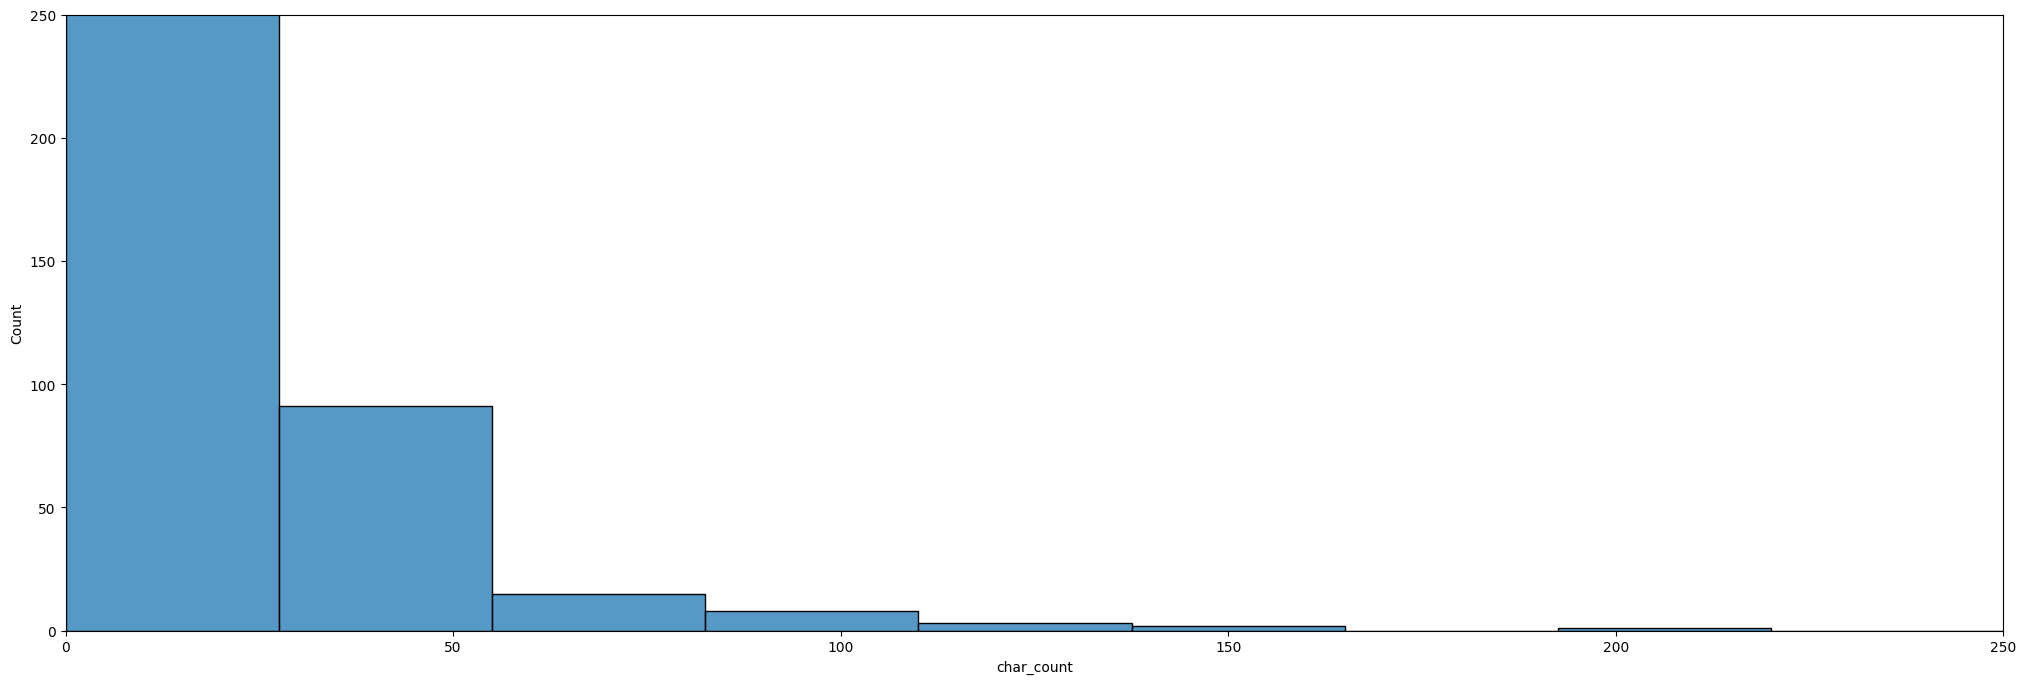

In [ ]:
# let's plot the distribution of the volume of characters the authors wrote
plt.figure(figsize=(25,8))
plt.ylim(0, 250)
plt.xlim(0, 250)
sns.histplot(books_df.groupby('authors')['char_count'].count(), bins=100)
plt.show()

In [ ]:
# display the most popular books on the API
books_df.sort_values(by='download_count', ascending=False).head(20)


,id,title,authors,subjects,languages,formats,download_count,char_count,word_count
0,16389,The Enchanted April,Von Arnim Elizabeth,British -- Italy -- Fiction Domestic fiction F...,en,https://www.gutenberg.org/ebooks/16389.txt.utf-8,118812,NaN,NaN
1,1513,Romeo and Juliet,Shakespeare William,Conflict of generations -- Drama Juliet (Ficti...,en,https://www.gutenberg.org/ebooks/1513.txt.utf-8,103473,NaN,NaN
2,37106,Little Women; Or Meg Jo Beth and Amy,Alcott Louisa May,Autobiographical fiction Bildungsromans Domest...,en,https://www.gutenberg.org/ebooks/37106.txt.utf-8,98681,NaN,NaN
3,145,Middlemarch,Eliot George,Bildungsromans City and town life -- Fiction D...,en,https://www.gutenberg.org/ebooks/145.txt.utf-8,85099,NaN,NaN
4,2641,A Room with a View,Forster E. M. (Edward Morgan),British -- Italy -- Fiction England -- Fiction...,en,https://www.gutenberg.org/ebooks/2641.txt.utf-8,84883,NaN,NaN
5,67979,The Blue Castle: a novel,Montgomery L. M. (Lucy Maud),Canada -- History -- 1914-1945 -- Fiction Choi...,en,https://www.gutenberg.org/ebooks/67979.txt.utf-8,79674,NaN,NaN
6,100,The Complete Works of William Shakespeare,Shakespeare William,English drama -- Early modern and Elizabethan ...,en,https://www.gutenberg.org/ebooks/100.txt.utf-8,76216,5441578.0,965539.0
7,394,Cranford,Gaskell Elizabeth Cleghorn,England -- Fiction Female friendship -- Fictio...,en,https://www.gutenberg.org/ebooks/394.txt.utf-8,73181,408614.0,74020.0
8,6761,The Adventures of Ferdinand Count Fathom — Com...,Smollett T. (Tobias),Adventure stories Gothic fiction,en,https://www.gutenberg.org/ebooks/6761.txt.utf-8,68408,974207.0,164706.0
9,1259,Twenty Years After,Dumas Alexandre,France -- History -- Louis XIV 1643-1715 -- Fi...,en,https://www.gutenberg.org/ebooks/1259.txt.utf-8,66851,1387264.0,245097.0


In [ ]:
# get a list of authors with more than 1 book in the dataset
authors = books_df['authors'].value_counts()
authors = authors[authors > 1]
authors = authors.index.tolist()

books_df = books_df[books_df['authors'].isin(authors)]
books_df 

,id,title,authors,subjects,languages,formats,download_count,char_count,word_count
0,16389,The Enchanted April,Von Arnim Elizabeth,British -- Italy -- Fiction Domestic fiction F...,en,https://www.gutenberg.org/ebooks/16389.txt.utf-8,118812,NaN,NaN
1,1513,Romeo and Juliet,Shakespeare William,Conflict of generations -- Drama Juliet (Ficti...,en,https://www.gutenberg.org/ebooks/1513.txt.utf-8,103473,NaN,NaN
2,37106,Little Women; Or Meg Jo Beth and Amy,Alcott Louisa May,Autobiographical fiction Bildungsromans Domest...,en,https://www.gutenberg.org/ebooks/37106.txt.utf-8,98681,NaN,NaN
3,145,Middlemarch,Eliot George,Bildungsromans City and town life -- Fiction D...,en,https://www.gutenberg.org/ebooks/145.txt.utf-8,85099,NaN,NaN
4,2641,A Room with a View,Forster E. M. (Edward Morgan),British -- Italy -- Fiction England -- Fiction...,en,https://www.gutenberg.org/ebooks/2641.txt.utf-8,84883,NaN,NaN
...,...,...,...,...,...,...,...,...,...
37663,6246,The Right of Way — Volume 04,Parker Gilbert,Canadian fiction,en,https://www.gutenberg.org/ebooks/6246.txt.utf-8,0,141001.0,25013.0
37664,6262,The Weavers: a tale of England and Egypt of fi...,Parker Gilbert,Society of Friends -- Fiction,en,https://www.gutenberg.org/ebooks/6262.txt.utf-8,0,254733.0,45708.0
37665,6297,Carnac's Folly Volume 2.,Parker Gilbert,Fiction,en,https://www.gutenberg.org/ebooks/6297.txt.utf-8,0,61164.0,10794.0
37666,8266,The World English Bible (WEB): Malachi,Anonymous,Bible. Malachi,en,https://www.gutenberg.org/ebooks/8266.txt.utf-8,0,24858.0,4054.0


# After initial investigation, we decided to focus on:
#### - only 10 authors 
#### - that have written a lot in terms of character count
#### - that have different writing styles

In [ ]:
# check out the authors that has the most total characaters written 
books_df.groupby('authors')['char_count'].sum().sort_values(ascending=False).head(30)

authors
Various                                       806970084.0
Anonymous                                      79988683.0
Project Gutenberg                              74753070.0
Fenn George Manville                           67309156.0
Kingston William Henry Giles                   60873835.0
Trollope Anthony                               54793544.0
Henty G. A. (George Alfred)                    50266049.0
Library of Congress. Copyright Office          40148374.0
Motley John Lothrop                            39277536.0
James G. P. R. (George Payne Rainsford)        37970928.0
Ballantyne R. M. (Robert Michael)              37551935.0
Shakespeare William                            35482816.0
Twain Mark                                     34765682.0
Meredith George                                34506021.0
United States. Central Intelligence Agency     34422980.0
Reid Mayne                                     32986742.0
Marryat Frederick                              32047527.0
Ebers 

In [ ]:
# let's settle for these 10 candidates
most_famous = ['Shakespeare William',
               'Montgomery L. M. (Lucy Maud)',
               'Wilde Oscar',
               'Dickens Charles',
               'Fitzgerald F. Scott (Francis Scott)',
               'Twain Mark',
               'Plato',
               'Homer',
               'Tolstoy Leo graf',
               'Austen Jane']

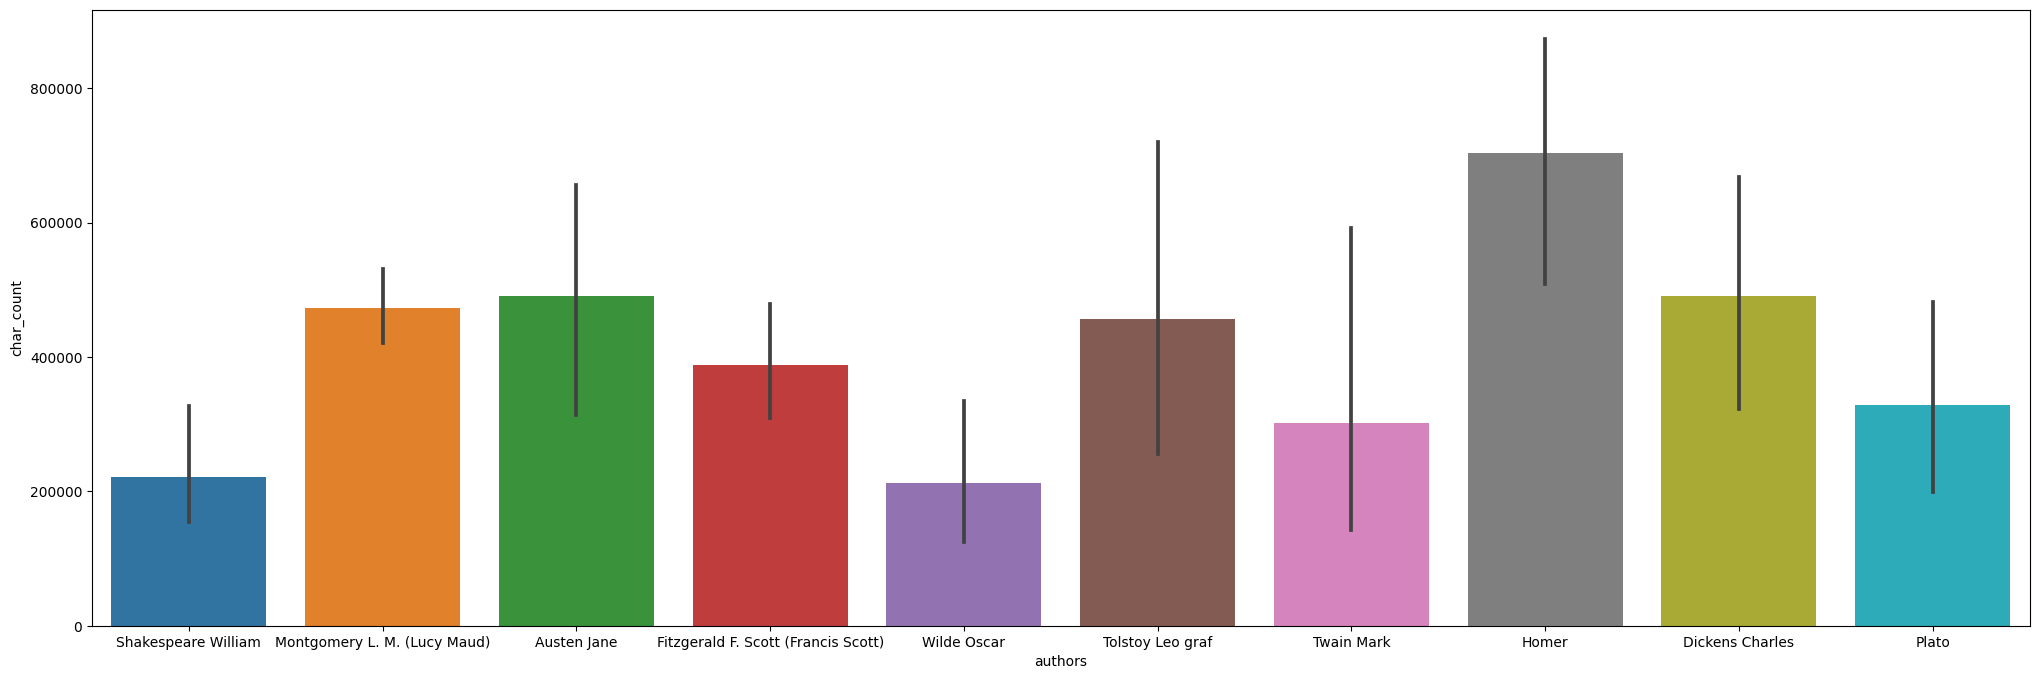

In [ ]:
plt.figure(figsize=(25,8))
sns.barplot(x=books_df[books_df['authors'].isin(most_famous)]['authors'], y=books_df[books_df['authors'].isin(most_famous)]['char_count'])
plt.show()

In [ ]:
books_df = books_df[books_df['authors'].isin(most_famous)]
books_df

NameError: name 'books_df' is not defined

In [ ]:
# let's get ours books and go to the next step, the data cleaning, formatting, chunking, tokenizating and vectorizating

book_list = books_df['id'].tolist() # list of all books from the most famous authors 472
for book in book_list:
    !cp /Users/nicolas/code/Nico404/youwritelike/ywl/data/raw/books/{book}.txt /Users/nicolas/code/Nico404/youwritelike/ywl/data/raw/books_shortlist/{book}.txt

NameError: name 'books_df' is not defined